In [2]:
#import packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

#### Import Data

In [57]:
#Import exits
exits_gdf = gpd.read_file('../Data/MJBA/Exits.shp')

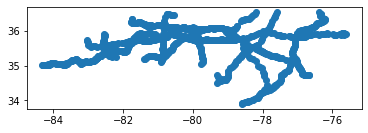

In [13]:
exits_gdf.plot()

In [29]:
#Import dcfc as pandas dataframe
dcfc_df = pd.read_csv('../Data/NREL/DCFC.csv')
dcfc_df.head()
dcfc_df.shape
dcfc_df = dcfc_df[0:68]

In [30]:
coordinates = []
thelats = dcfc_df['latitude']
thelongs = dcfc_df['longitude']

In [31]:
len(thelats)

68

In [32]:
len(thelongs)

68

In [34]:
thelats[0], thelongs[0]

(35.392063, -80.622777)

In [42]:
theZip = zip(thelongs,thelats)
type(theZip)

zip

In [44]:
geometry = []
for x in theZip:
    geometry.append(Point(x))

In [45]:
geometry

In [47]:
#Create geometries for dcfc features
geometry = [Point(xy) for xy in zip(dcfc_df['longitude'],dcfc_df['latitude'])]

In [55]:
#create the geopandas geodataframe from above
dcfc_gdf = gpd.GeoDataFrame(dcfc_df, geometry=geometry,crs=4326)

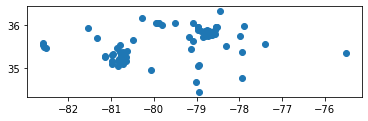

In [53]:
dcfc_gpd.plot()

#### Coordinate Reference Systems

In [59]:
#show current crs
print(exits_gdf.crs)
print(dcfc_gdf.crs)

epsg:4326
epsg:4326


In [80]:
exits_gdf = exits_gdf.to_crs(32617)
dcfc_gdf=dcfc_gdf.to_crs(32617)

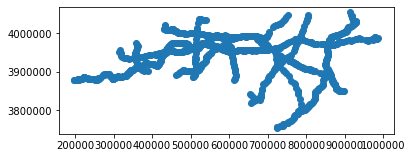

In [62]:
exits_gdf.plot()

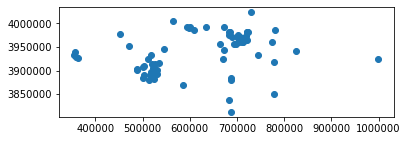

In [63]:
dcfc_gdf.plot()

#### Compute Nearest Points

In [66]:
mp_dcfc = dcfc_gdf.geometry.unary_union
type(mp_dcfc)

shapely.geometry.multipoint.MultiPoint

In [67]:
theExitPoint = exits_gdf.at[0,'geometry']
print(theExitPoint)

POINT (197578.0117120936 3880227.389321998)


In [69]:
fromPt, toPt = nearest_points(theExitPoint, mp_dcfc)

In [71]:
print(toPt)

POINT (354769.6046992752 3932953.218764007)


In [72]:
fromPt.distance(toPt)

165798.70324039215

In [75]:
def distance_to_dcfc(thePoint,mp_dcfc):
    fromPt, toPt = nearest_points(thePoint, mp_dcfc)
    theDistance = fromPt.distance(toPt)
    return theDistance

In [84]:
theDistances = exits_gdf['geometry'].apply(lambda x: distance_to_dcfc(x,mp_dcfc))

In [86]:
exits_gdf['Dist_to_DCFC'] = theDistances

In [87]:
exits_gdf.head()

,FID,Exit_ID,Longitude,Latitude,County,State,Highway,Type,AADT,Pop_dens,Comm_1mi,Ports_5mi,Ports_10mi,Ports_20mi,Close_nonT,geometry,Dist_to_DCFC
0,7059,US-64_Cherokee_NC_Exit_1,-84.314304,35.019492,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3700,60.34979,1,0,0,0,34.094152,POINT (197578.012 3880227.389),165798.703240
1,7060,US-64_Cherokee_NC_Exit_2,-84.311492,35.014933,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3700,60.34979,1,0,0,0,34.365230,POINT (197817.907 3879713.054),165735.785722
2,7061,US-64_Cherokee_NC_Exit_3,-84.295528,35.013561,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.34979,0,0,0,0,35.233979,POINT (199270.172 3879512.464),164426.238471
3,7062,US-64_Cherokee_NC_Exit_4,-84.280291,35.012880,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.34979,0,0,0,0,36.048303,POINT (200658.638 3879391.092),163153.582530
4,7063,US-64_Cherokee_NC_Exit_5,-84.275190,35.017816,Cherokee,NC,U.S. Highway 64,Exit/Intersection,3900,60.34979,0,0,0,0,36.186597,POINT (201142.266 3879923.503),162522.336504


In [88]:
exits_gdf.to_file('../Data/processed/Exits_distance_to_DCFC.shp')

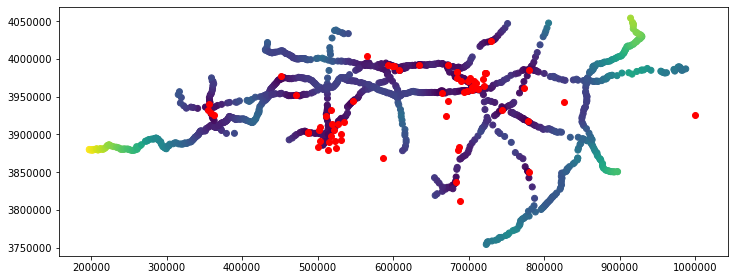

In [94]:
ax = exits_gdf.plot('Dist_to_DCFC',figsize=(12,6))
dcfc_gdf.plot(ax = ax, color='red')